**Integrantes:**
*   Arturo Lazcano
*   Daniel Minaya
*   Sebastián Cobaise



In [1]:
import numpy as np
import numpy.random as nr
import scipy as sp
import scipy.stats as ss
import random as r
from numpy import pi as pi
import matplotlib.pyplot as plt
import seaborn as sb
import time
import pandas as pd
import math as m

#print(nr.uniform())
#print(ss.uniform.rvs())
#print(r.uniform(0,1))

#Pregunta 1

Se programa la función para generar las uniformes que necesitemos para los 3 métodos.

In [ ]:
#recibe un numero (n) y un string (metodo) genera n uniformes en [0,1] usando el metodo indicado
def uniforme(n,metodo):
  if metodo=="numpy":
    U=[]
    for i in range(n):
      U.append(nr.uniform())
    return U
  if metodo=="scipy":
    U=[]
    for i in range(n):
      U.append(ss.uniform.rvs())
    return U
  if metodo=="random":
    U=[]
    for i in range(n):
      U.append(r.uniform(0,1))
    return U
  else:
    U=[]
    for i in range(n):
      U.append(r.uniform(0,1))
    return U

Veamos en acción estas librerias generando $10^6$ muestras de cada una.

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Valor'),
 Text(0.5, 1.0, '1e6 uniformes usando Numpy')]

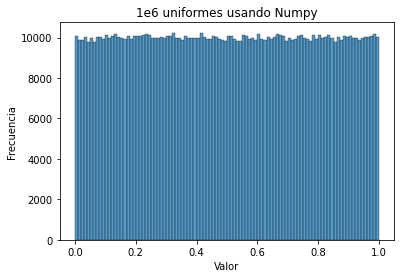

In [ ]:
#Numpy
U=uniforme(10**6,"numpy")
sb.histplot(U).set(title='1e6 uniformes usando Numpy', xlabel = "Valor", ylabel = "Frecuencia")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Valor'),
 Text(0.5, 1.0, '1e6 uniformes usando Scipy')]

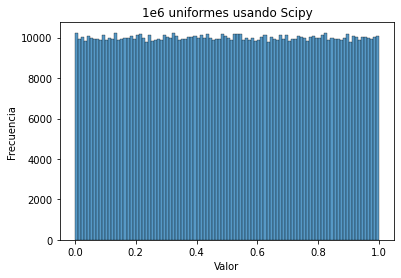

In [ ]:
#Scipy
U=uniforme(10**6,"scipy")
sb.histplot(U).set(title='1e6 uniformes usando Scipy', xlabel = "Valor", ylabel = "Frecuencia")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Valor'),
 Text(0.5, 1.0, '1e6 uniformes usando Random')]

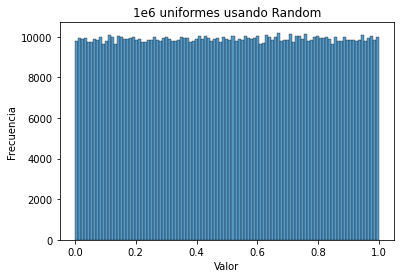

In [ ]:
#Random
U=uniforme(10**6,"random")
sb.histplot(U).set(title='1e6 uniformes usando Random', xlabel = "Valor", ylabel = "Frecuencia")

Se ve que para los 3 métodos, la cantidad de datos en cada intervalo que particiona a $[0,1]$ es muy parecida, lo cual es de esperar para una uniforme, los 3 histogramas son muy parecidos.

[Text(0, 0.5, 'Tiempo usado (s)'),
 Text(0.5, 0, 'muestra'),
 Text(0.5, 1.0, 'Tiempo utilizado por cada librería')]

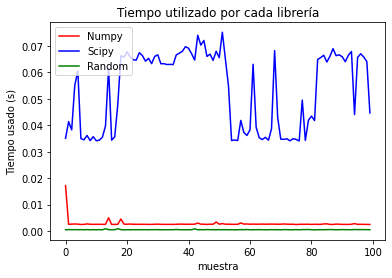

In [ ]:
t_numpy=[]
t_scipy=[]
t_random=[]
for i in range(100):
  inicio=time.time()
  U=uniforme(1000,"numpy")
  final=time.time()
  t_numpy.append(final-inicio)
  inicio=time.time()
  U=uniforme(1000,"scipy")
  final=time.time()
  t_scipy.append(final-inicio)
  inicio=time.time()
  U=uniforme(1000,"random")
  final=time.time()
  t_random.append(final-inicio)
sb.lineplot(x=range(100),y=t_numpy,color="red",label="Numpy")
sb.lineplot(x=range(100),y=t_scipy,color="blue",label="Scipy")
sb.lineplot(x=range(100),y=t_random,color="green",label="Random").set(title='Tiempo utilizado por cada librería',xlabel = "muestra", ylabel = "Tiempo usado (s)")

En el gráfico se puede observar claramente que Scipy demora una cantidad muy poco consistente para generar cada muestra, además es la peor de las 3 en términos de rapidez, las librerías Numpy y Random presentan un comportamiento parecido, pero Random demuestra ser el más rápido.

A continuación se calculan la media y varianza en el tiempo que demora cada método, este resultado es acorde a lo analizado del gráfico.

In [ ]:
mediaNumpy=0
mediaScipy=0
mediaRandom=0
varNumpy=0
varScipy=0
varRandom=0
for i in range(100):
  mediaNumpy+=t_numpy[i]
  mediaScipy+=t_scipy[i]
  mediaRandom+=t_random[i]
mediaNumpy=mediaNumpy/100
mediaScipy=mediaScipy/100
mediaRandom=mediaRandom/100
for i in range(100):
  varNumpy+=(mediaNumpy-t_numpy[i])**2
  varScipy+=(mediaScipy-t_scipy[i])**2
  varRandom+=(mediaRandom-t_random[i])**2
varNumpy=varNumpy/100
varScipy=varScipy/100
varRandom=varRandom/100
tabla=pd.DataFrame({'Librería': ["Numpy","Scipy","Random"],
                        'Esperanza': [mediaNumpy,mediaScipy,mediaRandom], 
                        'Varianza': [varNumpy,varScipy,varRandom]
})
tabla

,Librería,Esperanza,Varianza
0,Numpy,0.002784,2.202268e-06
1,Scipy,0.053588,2.098533e-04
2,Random,0.000526,4.317079e-09


Con esta tabla ya no quedan dudas, se concluye que Random es la mejor librería, pues es presenta la menor media y además tiene la menor varianza, por lo que es la librería más consistente.

Ahora se crea la función para generar variables aleatorias con cada método.

In [ ]:
#Genera una v.a. bernoulli de parametro p en [0,1], usando la librería indicada en metodo para generar uniformes
def bernoulli(p,metodo):
  if metodo=="numpy":
    return np.random.binomial(1,p)

  if metodo=="scipy":
    return ss.bernoulli.rvs(p)
  
  if metodo=="random":
    U=uniforme(1,"random")
    if U[0]<=p:
      ber=1
    else:
      ber=0
    return ber
  

#Genera una v.a. binomial de parametros p en [0,1] y N natural, usando la librería indicada en metodo para generar uniformes
def binomial(p,N,metodo):
  if metodo=="numpy":
    return np.random.binomial(N,p)

  if metodo=="scipy":
    return ss.binom.rvs(N, p)

  if metodo=="random":
    bin=0
    for i in range(N):
      bin+=bernoulli(p,"random")
    return bin

#Genera una v.a. geometrica de parametro p en [0,1], usando la librería indicada en metodo para generar uniformes
def geometrica(p,metodo):
  if metodo=="numpy":
    return np.random.geometric(p)

  if metodo=="scipy":
    return ss.geom.rvs(p)

  if metodo=="random":
    geo=1
    while True:
      ber=bernoulli(p,metodo)
      if ber==1:
        return geo
      geo+=1

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Valor'),
 Text(0.5, 1.0, 'Simulación de 10000 v.a. bernoulli(0.5) usando Numpy')]

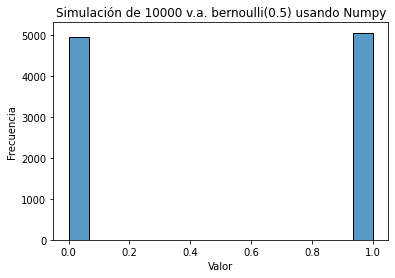

In [ ]:
#Histogramas
#Bernoulli
berNumpy=[]
berScipy=[]
berRandom=[]
for i in range(10000):
  berNumpy.append(bernoulli(0.5,"numpy"))
  berScipy.append(bernoulli(0.5,"scipy"))
  berRandom.append(bernoulli(0.5,"random"))

sb.histplot(berNumpy).set(title='Simulación de 10000 v.a. bernoulli(0.5) usando Numpy', xlabel = "Valor", ylabel = "Frecuencia")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Valor'),
 Text(0.5, 1.0, 'Simulación de 10000 v.a. bernoulli(0.5) usando Scipy')]

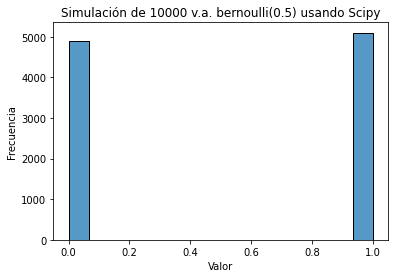

In [ ]:
sb.histplot(berScipy).set(title='Simulación de 10000 v.a. bernoulli(0.5) usando Scipy', xlabel = "Valor", ylabel = "Frecuencia")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Valor'),
 Text(0.5, 1.0, 'Simulación de 10000 v.a. bernoulli(0.5) usando Random')]

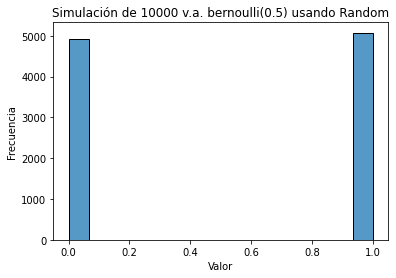

In [ ]:
sb.histplot(berRandom).set(title='Simulación de 10000 v.a. bernoulli(0.5) usando Random', xlabel = "Valor", ylabel = "Frecuencia")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Valor'),
 Text(0.5, 1.0, 'Simulación de 10000 v.a. binomial(0.5,50) usando Numpy')]

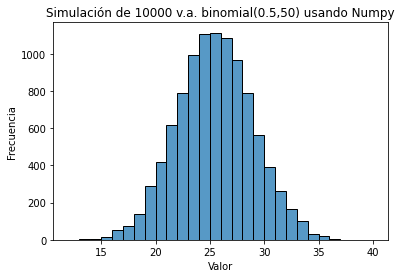

In [ ]:
#Histogramas
#Binomial
binNumpy=[]
binScipy=[]
binRandom=[]
for i in range(10000):
  binNumpy.append(binomial(0.5,50,"numpy"))
  binScipy.append(binomial(0.5,50,"scipy"))
  binRandom.append(binomial(0.5,50,"random"))

sb.histplot(binNumpy,binwidth =1).set(title='Simulación de 10000 v.a. binomial(0.5,50) usando Numpy', xlabel = "Valor", ylabel = "Frecuencia")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Valor'),
 Text(0.5, 1.0, 'Simulación de 10000 v.a. binomial(0.5,50) usando Scipy')]

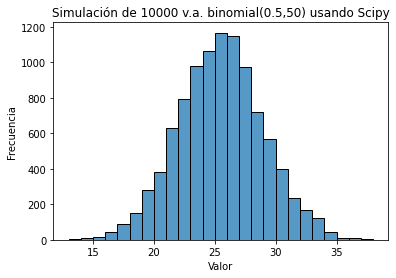

In [ ]:
sb.histplot(binScipy,binwidth =1).set(title='Simulación de 10000 v.a. binomial(0.5,50) usando Scipy', xlabel = "Valor", ylabel = "Frecuencia")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Valor'),
 Text(0.5, 1.0, 'Simulación de 10000 v.a. binomial(0.5,50) usando Random')]

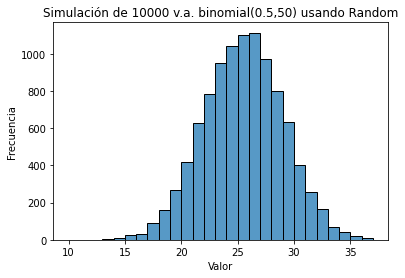

In [ ]:
sb.histplot(binRandom,binwidth =1).set(title='Simulación de 10000 v.a. binomial(0.5,50) usando Random', xlabel = "Valor", ylabel = "Frecuencia")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Valor'),
 Text(0.5, 1.0, 'Simulación de 10000 v.a. geometrica(0.4) usando Numpy')]

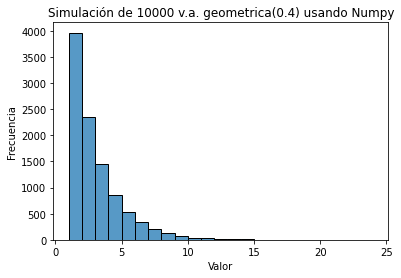

In [ ]:
#Histogramas
#Geometrica
geoNumpy=[]
geoScipy=[]
geoRandom=[]
for i in range(10000):
  geoNumpy.append(geometrica(0.4,"numpy"))
  geoScipy.append(geometrica(0.4,"scipy"))
  geoRandom.append(geometrica(0.4,"random"))

sb.histplot(geoNumpy,binwidth =1).set(title='Simulación de 10000 v.a. geometrica(0.4) usando Numpy', xlabel = "Valor", ylabel = "Frecuencia")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Valor'),
 Text(0.5, 1.0, 'Simulación de 10000 v.a. geometrica(0.4) usando Scipy')]

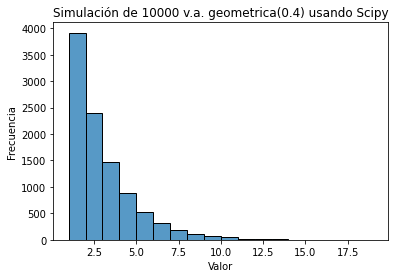

In [ ]:
sb.histplot(geoScipy,binwidth =1).set(title='Simulación de 10000 v.a. geometrica(0.4) usando Scipy', xlabel = "Valor", ylabel = "Frecuencia")

[Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 0, 'Valor'),
 Text(0.5, 1.0, 'Simulación de 10000 v.a. geometrica(0.4) usando Random')]

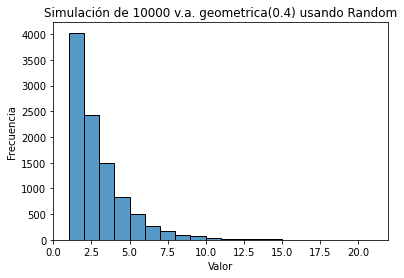

In [ ]:
sb.histplot(geoRandom,binwidth =1).set(title='Simulación de 10000 v.a. geometrica(0.4) usando Random', xlabel = "Valor", ylabel = "Frecuencia")

De los 9 gráficos anteriores se observa un comportamiento esperado para las variables aleatorias correspondientes y el resultado es similar en cada método.

[Text(0, 0.5, 'Tiempo usado (s)'),
 Text(0.5, 0, 'muestra'),
 Text(0.5, 1.0, 'Tiempo utilizado por cada metodo para generar 1000 v.a. bernoulli(0.5)')]

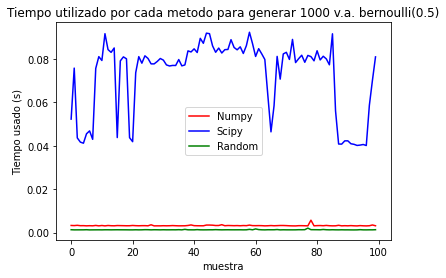

In [ ]:
#Comparacion entre metodos para generar una bernoulli
t_numpy=[]
t_scipy=[]
t_random=[]
for i in range(100):
  inicio=time.time()
  for j in range(1000):
    U=bernoulli(0.5,"numpy")
  final=time.time()
  t_numpy.append(final-inicio)
  inicio=time.time()
  for j in range(1000):
    U=bernoulli(0.5,"scipy")
  final=time.time()
  t_scipy.append(final-inicio)
  inicio=time.time()
  for j in range(1000):
    U=bernoulli(0.5,"random")
  final=time.time()
  t_random.append(final-inicio)
sb.lineplot(x=range(100),y=t_numpy,color="red",label="Numpy")
sb.lineplot(x=range(100),y=t_scipy,color="blue",label="Scipy")
sb.lineplot(x=range(100),y=t_random,color="green",label="Random").set(title='Tiempo utilizado por cada metodo para generar 1000 v.a. bernoulli(0.5)',xlabel = "muestra", ylabel = "Tiempo usado (s)")

Con respecto a la variable aleatoria bernoulli, se obtiene un análisis similar la realizado con la v.a. uniforme, dado que una bernoulli se puede generar directamente a partir de una uniforme.

Se concluye que la librería random con la función bernoulli(p,"random") es el método más rápido de los 3 de generar una bernoulli.

[Text(0, 0.5, 'Tiempo usado (s)'),
 Text(0.5, 0, 'muestra'),
 Text(0.5, 1.0, 'Tiempo utilizado por cada metodo para generar 1000 v.a. binomial(0.5,50)')]

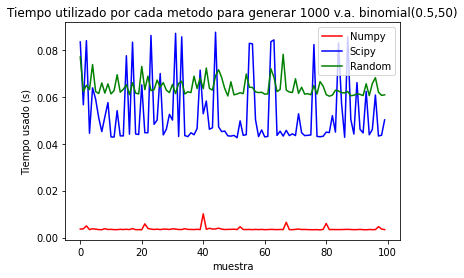

In [ ]:
#Comparacion entre metodos para generar una bernoulli
t_numpy=[]
t_scipy=[]
t_random=[]
for i in range(100):
  inicio=time.time()
  for j in range(1000):
    U=binomial(0.5,50,"numpy")
  final=time.time()
  t_numpy.append(final-inicio)
  inicio=time.time()
  for j in range(1000):
    U=binomial(0.5,50,"scipy")
  final=time.time()
  t_scipy.append(final-inicio)
  inicio=time.time()
  for j in range(1000):
    U=binomial(0.5,50,"random")
  final=time.time()
  t_random.append(final-inicio)
sb.lineplot(x=range(100),y=t_numpy,color="red",label="Numpy")
sb.lineplot(x=range(100),y=t_scipy,color="blue",label="Scipy")
sb.lineplot(x=range(100),y=t_random,color="green",label="Random").set(title='Tiempo utilizado por cada metodo para generar 1000 v.a. binomial(0.5,50)',xlabel = "muestra", ylabel = "Tiempo usado (s)")

Considerando el caso de la v.a. Binomial(0.5,50), las librerías Numpy y Scipy tienen un comportamiento similar en cuanto a como se ven en los gráficos previos, en cambio la librería Random ahora presenta una media cercana a la de Scipy.

Esto se debe a como se construyó la función binomial(p,N,"random"),pues para generar una binomial hay que sumar N bernoulli y este proceso puede ser costoso.

Se concluye que el método más rápido de los 3 para generar una binomial es con Numpy.

[Text(0, 0.5, 'Tiempo usado (s)'),
 Text(0.5, 0, 'muestra'),
 Text(0.5, 1.0, 'Tiempo utilizado por cada metodo para generar 1000 v.a. geometrica(0.4)')]

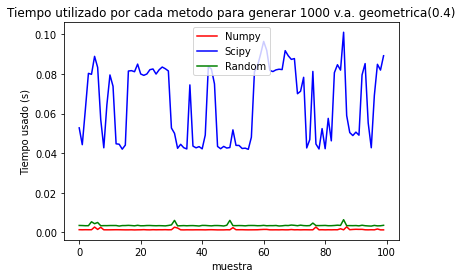

In [ ]:
#Comparacion entre metodos para generar una bernoulli
t_numpy=[]
t_scipy=[]
t_random=[]
for i in range(100):
  inicio=time.time()
  for j in range(1000):
    U=geometrica(0.4,"numpy")
  final=time.time()
  t_numpy.append(final-inicio)
  inicio=time.time()
  for j in range(1000):
    U=geometrica(0.4,"scipy")
  final=time.time()
  t_scipy.append(final-inicio)
  inicio=time.time()
  for j in range(1000):
    U=geometrica(0.4,"random")
  final=time.time()
  t_random.append(final-inicio)
sb.lineplot(x=range(100),y=t_numpy,color="red",label="Numpy")
sb.lineplot(x=range(100),y=t_scipy,color="blue",label="Scipy")
sb.lineplot(x=range(100),y=t_random,color="green",label="Random").set(title='Tiempo utilizado por cada metodo para generar 1000 v.a. geometrica(0.4)',xlabel = "muestra", ylabel = "Tiempo usado (s)")

El caso de la v.a. geométrica resultó en que usando Numpy se consume menos tiempo, seguido de Random a partir de uniformes y finalmente Scipy, con una varianza elevada como se observó en los otros 2 gráficos anteriores.

Las tres librerías que se estudiaron a lo largo de este problema generan números pseudoaleatorios.

Para esto se utilizan PRNGs (Pseudo Random Number Generators),
Los cuales se pueden interpretar como una función, que recibe una entrada (llamada "seed" o "semilla") y devuelve un número completamente dependiente de la entrada, por esto se llaman números pseudoaleatorios, si se conoce la seed se puede determinar completamente el resultado. Esta seed se puede obtener de alguna variable del propio computador, como por ejemplo, la hora en la que se ejecuta una instrucción en específico, pero cambiar ínfimamente la seed se traduce en generar un número completamente distinto.

In [ ]:
#Para ejemplificar que conociendo la seed el resultado del PRNG se puede determinar completamente,
#Aquí se genera 20 veces un float entre 0 y 1 ingresando la misma seed al inicio de cada réplica.
#Se puede observar que se imprime 20 veces el mismo número. :o

seed=r.getstate()
print("seed:",seed)
for i in range(20):
  r.setstate(seed)
  print(r.uniform(0,1))

seed: (3, (1656129371, 2663647314, 2440965894, 3602902852, 3715774599, 1232139396, 278565964, 1468634444, 3311444924, 2983719731, 2866915470, 2763964155, 3633220284, 1518992684, 828911917, 3218514254, 636021584, 1198723292, 3251719912, 3612524265, 972367519, 567307489, 3938753892, 2957142778, 2528102653, 2133103234, 2223711635, 2131580680, 3685727909, 1623150442, 1548974468, 3241056556, 159266597, 178012711, 3965918316, 2887814269, 1719720202, 287126606, 183300606, 3469692142, 3421652105, 3318386683, 2258111392, 878277190, 3990129905, 934896654, 3566750151, 4184239268, 21615017, 2085209155, 848696284, 3580186509, 3100171277, 522646693, 1501754000, 1098681494, 758106053, 1661597528, 4085269068, 1868590008, 3057006965, 2633039475, 218515858, 3388707489, 3441155704, 515719768, 2789803870, 2167639883, 2348954589, 3979398506, 1761201893, 1998941761, 3940570002, 1448003802, 2255457599, 3246779926, 2547195593, 4107433453, 2320592744, 1095839706, 2119681535, 3389556274, 2242225109, 2538358409,

La librería Random de Python 3.9.7 utiliza el PRNG llamado Mersenne Twister como generador, el cual produce floats con una precisión de 53 bits (unas 17 cifras significativas) y tiene un periodo de $2^{19937}-1$, por lo que genera $2^{19937}-1$ valores antes de volver al primero.

Con el experimento anterior también cabe destacar que es posible cambiar la semilla con la función `setstate`.

#Pregunta 2

Para la variable aleatoria $X=\sqrt{1-U^2}$, notamos que su esperanza corresponde a $\mathbb{E}(X)=\int_0^1\sqrt{1-x^2}dx=\frac{\pi}{4}$

Luego $Var(X)=\mathbb{E}(X^2)-\frac{\pi^2}{16}$.

$\mathbb{E}(X^2)=\int_0^1{(1-x^2)}dx=[x-\frac{x^3}{3}]\Big|_0^1=\frac{2}{3}$

Por lo que $Var(X)=\frac{2}{3}-\frac{\pi^2}{16}\approx 0.0498$

La variable aleatoria $Z$ corresponde a una bernoulli de parámetro $p=\frac{A}{B}$ donde $A$ es el área de un cuarto de circulo de radio 1 y $B$ el área de un cuadrado de lado 1 ($A=\frac{\pi}{4}$ y $B=1$),
entonces $p=\frac{\pi}{4}$

Con esto, sabemos que $Var(Z)=p(1-p)=\frac{\pi}{4}*\frac{4-\pi}{4}\approx 0.1685$

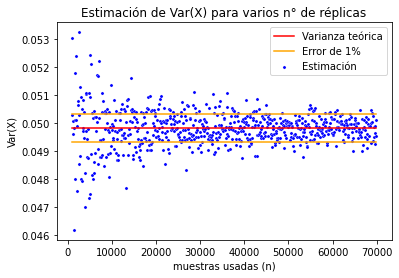

In [ ]:
n=[]
for i in range(10,700):
  n.append(100*i)
#X
#demora ~ 1 min
varX=[]
for i in n:
  U=uniforme(i,"random")
  estimacion=0
  for j in range(i):
    estimacion+=((pi/4)-(1-U[j]**2)**(1/2))**2
  estimacion=estimacion/(i-1)
  varX.append(estimacion)

sb.scatterplot(x=n,y=varX,color='blue',s = 10,label="Estimación").set(title='Estimación de Var(X) para varios n° de réplicas',xlabel = "muestras usadas (n)", ylabel = "Var(X)")
sb.lineplot(x=n,y=0.0498,color='red',label="Varianza teórica")
sb.lineplot(x=n,y=0.0493,color='orange',label="Error de 1%")
sb.lineplot(x=n,y=0.0503,color='orange')

Importante mencionar que para cada número de réplicas (n), se usan n muestras que no tienen ninguna relación a las usadas para otro n.
De aquí se aproxima que con 30000 en adelante la mayoria de las veces el 
resultado se encuentra en el rango deseado.

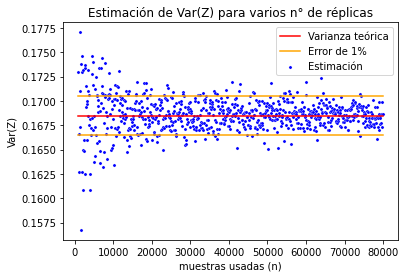

In [ ]:
n=[]
for i in range(10,800):
  n.append(100*i)
#Para Z
#demora ~ 1 min
varZ=[]
for i in n:
  U1=uniforme(i,"random")
  U2=uniforme(i,"random")
  estimacion=0
  for j in range(i):
    aux=U1[j]**2+U2[j]**2
    if aux<=1:
      estimacion+=(pi/4-1)**2
    else:
      estimacion+=(pi/4)**2

  estimacion=estimacion/(i-1)
  varZ.append(estimacion)
sb.scatterplot(x=n,y=varZ,color='blue',s = 10,label="Estimación").set(title='Estimación de Var(Z) para varios n° de réplicas',xlabel = "muestras usadas (n)", ylabel = "Var(Z)")
sb.lineplot(x=n,y=0.1685,color='red',label="Varianza teórica")
sb.lineplot(x=n,y=0.1665,color='orange',label="Error de 1%")
sb.lineplot(x=n,y=0.1705,color='orange')

Se estima el mismo número, a partir de 30000 muestras el resultado casi siempre resulta con un error menor a 1%.

Sabemos que la cantidad de réplicas de X (n) necesarias para obtener una precision de $Err$ con una probabilidad de $Pr$ es $n\geq\frac{Var(X)*z^2_{(1-Pr)/2}}{Err^2}$

Reemplazando para los valores requeridos, se obtiene que los n mínimos necesarios son:

| Err | Pr  | N° para X | N° para Z |
| --- | --- | --- | --- |
|0.1  |0.9  |13 |45 |
|0.01 |0.95 |1913 |6472 |
|0.001|0.99 |330417 |1117980 |


In [ ]:
#Calculo de la tabla anterior
varX=0.0498
varZ=0.1685
#Err=0.1 Pr=0.9
Err=0.1
Pr=0.9
z=ss.norm.ppf(1-(1-Pr)/2)
nX=int(varX*z**2//Err**2)
nZ=int(varZ*z**2//Err**2)
print("Para Err1 y Pr1 se obtiene:")
print("nX=",nX,"y nZ=",nZ)
#Err=0.01 Pr=0.95
Err=0.01
Pr=0.95
z=ss.norm.ppf(1-(1-Pr)/2)
nX=int(varX*z**2//Err**2)
nZ=int(varZ*z**2//Err**2)
print("Para Err2 y Pr2 se obtiene:")
print("nX=",nX,"y nZ=",nZ)
#Err=0.001 Pr=0.99
Err=0.001
Pr=0.99
z=ss.norm.ppf(1-(1-Pr)/2)
nX=int(varX*z**2//Err**2)
nZ=int(varZ*z**2//Err**2)
print("Para Err3 y Pr3 se obtiene:")
print("nX=",nX,"y nZ=",nZ)

Para Err1 y Pr1 se obtiene:
nX= 13 y nZ= 45
Para Err2 y Pr2 se obtiene:
nX= 1913 y nZ= 6472
Para Err3 y Pr3 se obtiene:
nX= 330417 y nZ= 1117980


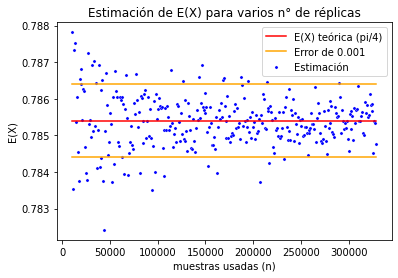

In [ ]:
#demora ~ 2 min
n=[]
for i in range(10,330):
  n.append(1000*i)
#X
EX=[]
timeX=[]
for i in n:
  t_inicio=time.time()
  U=uniforme(i,"random")
  estimacion=0
  for j in range(i):
    Xj= (1-U[j]**2)**(1/2)
    estimacion+=Xj
  estimacion=estimacion/i
  t_final=time.time()
  EX.append(estimacion)
  timeX.append(t_final-t_inicio)

sb.scatterplot(x=n,y=EX,color='blue',s = 10,label="Estimación").set(title='Estimación de E(X) para varios n° de réplicas',xlabel = "muestras usadas (n)", ylabel = "E(X)")
sb.lineplot(x=n,y=pi/4,color='red',label="E(X) teórica (pi/4)")
sb.lineplot(x=n,y=pi/4+0.001,color='orange',label="Error de 0.001")
sb.lineplot(x=n,y=pi/4-0.001,color='orange')

Se observa que a pedida que n aumenta, la cantidad de puntos fuera del margen de error disminuye, lo cual es de esperar considerando la teoría.

[Text(0, 0.5, 'Demora (s)'),
 Text(0.5, 0, 'Muestras usadas (n)'),
 Text(0.5, 1.0, 'Tiempo usado para cada n° de réplicas de X')]

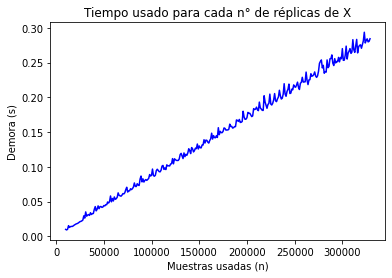

In [ ]:
sb.lineplot(x=n,y=timeX,color='blue').set(title='Tiempo usado para cada n° de réplicas de X',xlabel = "Muestras usadas (n)", ylabel = "Demora (s)")

Tiene sentido que haya una dependencia lineal, pues intuitivamente generar el doble de réplica debiese demorar el doble de tiempo aproximadamente.

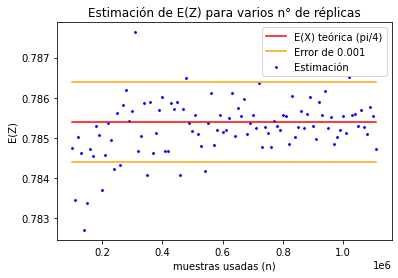

In [ ]:
#demora ~ 1 min
n=[]
for i in range(10,112):
  n.append(10000*i)
#Z
EZ=[]
timeZ=[]
for i in n:
  t_inicio=time.time()
  U1=uniforme(i,"random")
  U2=uniforme(i,"random")
  estimacion=0
  for j in range(i):
    Zindicatriz= U1[j]**2+U2[j]**2
    if Zindicatriz<=1:
      estimacion+=1
  estimacion=estimacion/i
  t_final=time.time()
  EZ.append(estimacion)
  timeZ.append(t_final-t_inicio)

sb.scatterplot(x=n,y=EZ,color='blue',s = 10,label="Estimación").set(title='Estimación de E(Z) para varios n° de réplicas',xlabel = "muestras usadas (n)", ylabel = "E(Z)")
sb.lineplot(x=n,y=pi/4,color='red',label="E(X) teórica (pi/4)")
sb.lineplot(x=n,y=pi/4+0.001,color='orange',label="Error de 0.001")
sb.lineplot(x=n,y=pi/4-0.001,color='orange')

[Text(0, 0.5, 'Demora (s)'),
 Text(0.5, 0, 'Muestras usadas (n)'),
 Text(0.5, 1.0, 'Tiempo usado para cada n° de réplicas de Z')]

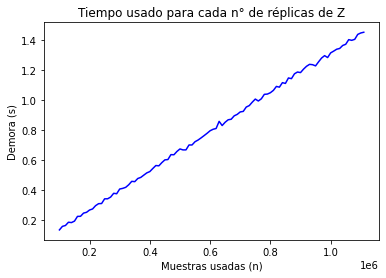

In [ ]:
sb.lineplot(x=n,y=timeZ,color='blue').set(title='Tiempo usado para cada n° de réplicas de Z',xlabel = "Muestras usadas (n)", ylabel = "Demora (s)")

Para estimar los costos se usan los datos obtenidos con el mayor n, dado que es el que aporta más información para la estimación.

In [ ]:
#Estimación del costo
costoX=timeX[-1]/n[-1]
costoZ=timeZ[-1]/n[-1]
print("Estimación de costos")
print("Costo de X (s):",costoX)
print("Costo de Z (s):",costoZ)

Estimación de costos
Costo de X (s): 2.561637947151253e-07
Costo de Z (s): 1.309503950514235e-06


Utilizando el teorema del límite central, se tiene una forma estandar de construir un intervalo de confianza. Asumiendo un n suficientemente grande, se cumple que $\mathbb{P}(|\bar X_n-I|\leq \frac{Var(X_1)}{\sqrt{n_x}}*z_{(1-Pr_3)/2})=\mathbb{P}(|\bar Z_n-I|\leq \frac{Var(Z_1)}{\sqrt{n_z}}*z_{(1-Pr_3)/2})=Pr_3$, donde $\bar Y_n$ es el promedio de n réplicas i.i.d de $Y\in \{X,Z\}$, $Var(X)\approx 0.0498$,
$Var(Z)\approx 0.1685$ y $z_{(1-Pr_3)/2}=z_{0.005}\approx 2.5758$

Es importante destacar que $n_x=330417$ y $n_z=1117980$, calculados anteriormente para considerar el margen de error $Err_3$.

De aquí se obtienen los intervalos de confianza:
$[\bar X_n-\epsilon_x,\bar X_n+\epsilon_x]$ y $[\bar Z_n-\epsilon_z,\bar Z_n+\epsilon_z]$
Considerando $\epsilon_x=2.2316e-4$ y $\epsilon_z=4.1048e-4$

In [ ]:
#Tiempo utilizado para el intervalo de confianza usando X
nx=330417
epsilonx=0.00022316
estimacionX=[]
tiempoX=[]

#Se calculan 20 veces la estimación
for i in range(20):
  inicio=time.time()
  U=uniforme(nx,"random")
  estimacion=0
  for j in range(nx):
    Xj=(1-U[j]**2)**(1/2)
    estimacion+=Xj
  estimacion=estimacion/nx
  final=time.time()
  estimacionX.append(estimacion)
  tiempoX.append(final-inicio)

#Estimación promedio
mean=0
for est in estimacionX:
  mean+=est
mean=mean/len(estimacionX)

t_total=0
for t in tiempoX:
  t_total+=t
t_promedio=t_total/len(tiempoX)

print("Error promedio de estimación usando X:",abs(mean-(pi/4)))
print("Costo total utilizado en promedio (s):", t_promedio)

Error promedio de estimación usando X: 0.0001189092427875682
Costo total utilizado en promedio (s): 0.28834904432296754


In [ ]:
#Tiempo utilizado para el intervalo de confianza usando Z
nz=1117980
epsilonz=0.00041048
estimacionZ=[]
tiempoZ=[]

#Se calculan 20 veces la estimación
for i in range(20):
  inicio=time.time()
  U1=uniforme(nz,"random")
  U2=uniforme(nz,"random")
  estimacion=0
  for j in range(nz):
    Zindicatriz=U1[j]**2+U2[j]**2
    if Zindicatriz<=1:
      estimacion+=1
  estimacion=estimacion/nz
  final=time.time()
  estimacionZ.append(estimacion)
  tiempoZ.append(final-inicio)

#Estimación promedio
mean=0
for est in estimacionZ:
  mean+=est
mean=mean/len(estimacionZ)

t_total=0
for t in tiempoZ:
  t_total+=t
t_promedio=t_total/len(tiempoZ)
print("Error promedio de estimación usando Z",abs(mean-(pi/4)))
print("Costo total utilizado en promedio (s):", t_promedio)

Error promedio de estimación usando Z 3.583363291004282e-05
Costo total utilizado en promedio (s): 1.4727465748786925


Se observa que los errores de estimación para ambas variables aleatorias son similares y se espera que estos errores sean menores que $Err_3$ pues esto resulta muy probable por la misma construcción de los intervalos.

El costo total de usar Z resulta ser mucho mayor que el de usar X. Lo cual tiene sentido pues el n utilizado en Z es mucho mayor.

Entre X y Z se obtiene un ratio de eficiencia de $\frac{C_{total}(X)}{C_{total}(Z)}=\frac{0.2867}{1.4415}=0.1989$

Para calcular el costo teórico, tenemos que X necesita 1 variable aleatoria uniforme por cada réplica, mientras que Y necesita 2.
Además el número de réplicas que se usan para X son 330417, y Z usa 1117980 réplicas, por lo que el $C_{teórico}(X)=330417$ y $C_{teórico}(Z)=2235960$.

Concluyendo que con este método, al igual que con el anterior, X resulta más eficiente.

Una diferencia que se obtiene con este método es el ratio de eficiencia, pues con este método resulta ser $\approx 0.1478$, esta diferencia puede deberse a que al considerar solo cuantas uniformes se ocupan, no se está considerando el costo asociado a utilizar estas uniformes (En el caso de X calcular $\sqrt{1-U^2}$ y en el de Z, evaluar la indicatriz.

Esta diferencia implica que calcular X posterior a la obtención de una uniforme, es más costoso que obtener Z con 2 uniformes conocidas, lo cual al no se considera en el costo teórico.
Por lo tanto, resulta preferible considerar el método anterior, con los costos totales.

#Pregunta 3

###Problema 1

Definiremos la función DiscreteQuantile que recibirá como parámetros una función $f$ que representará la función de probabilidad de una variable aleatoria discreta, y un vector $u=(u_1,\ldots,u_r)\in[0,1]^r$. Esta función retornará un vector $n=(n_1,\ldots,n_r)\in\mathbb{N}^r$ tal que para cada $i\in[r]=\{1,\ldots,r\}$ se cumple que $$\sum_{j=0}^{n_i}f(j)\geq u_i.$$

Para esto basta revisar cada $u_i$ e ir sumando $f(j)$ hasta sobrepasar $u_i$. El primer índice en el cual sobrepasemos $u_i$ corresponderá a $n_i$.

In [ ]:
def DiscreteQuantile(f,u,min=0):
    #La variable min indica el primer valor en el cual f es no nulo, es decir, min es el mínimo del soporte de f
    r=len(u)
    n=np.full(r,min)
    for i in range(r): #buscamos n_i para cada u_i
        suma=f(min)
        j=min+1
        while suma<u[i]:
            suma+=f(j)
            n[i]+=1
            j+=1
    return n

###Ejemplos

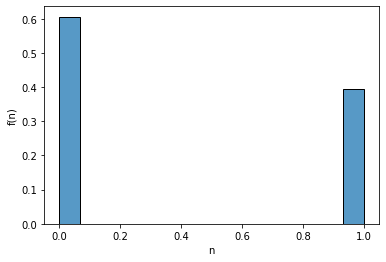

In [ ]:
#Distribución de Bernoulli
p=0.4
r=10000
f=lambda x: np.power(p,x)*np.power(1-p,1-x)
u=np.random.uniform(low=0,high=1,size=r)
n=DiscreteQuantile(f,u)
sb.histplot(data=n,stat='probability').set(xlabel="n",ylabel="f(n)")
plt.show()

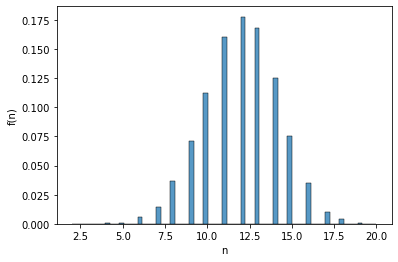

In [ ]:
#Distribución Binomial
p=0.6
N=20
r=10000
f=lambda x: sp.special.binom(N,x)*(p**x)*(1-p)**(N-x)
u=np.random.uniform(low=0,high=1,size=r)
n=DiscreteQuantile(f,u)
sb.histplot(data=n,stat='probability').set(xlabel="n",ylabel="f(n)")
plt.show()

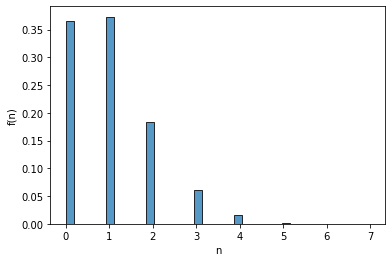

In [ ]:
#Distribución de Poisson
L=1
r=10000
f=lambda x: np.exp(-L)*np.power(L,x)/sp.special.factorial(x)
u=np.random.uniform(low=0,high=1,size=r)
n=DiscreteQuantile(f,u)
sb.histplot(data=n,stat='probability').set(xlabel="n",ylabel="f(n)")
plt.show()

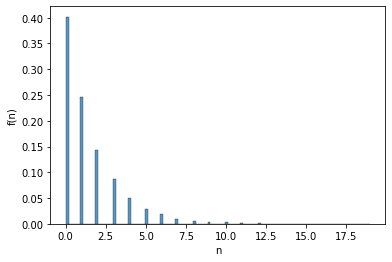

In [ ]:
#Distribución Geométrica
p=0.4
r=10000
f=lambda x: p*np.power(1-p,x)
u=np.random.uniform(low=0,high=1,size=r)
n=DiscreteQuantile(f,u)
sb.histplot(data=n,stat='probability').set(xlabel="n",ylabel="f(n)")
plt.show()

###Problema 2

Definiremos la función DiscreteQuantileF que recibirá como parámetros una función $F$ que representará la función de distribución de una variable aleatoria discreta, y un vector $u\in[0,1]^r$. Esta función retornará un vector $n=(n_1,\ldots,n_r)\in\mathbb{N}^r$ tal que para cada $i\in[r]$ se cumple que $$F(n_i)\geq u_i.$$

Para esto basta revisar cada $u_i$ y compararlo con $F(j)$ hasta sobrepasar $u_i$. Como $F$ es creciente, entonces basta ver la primera vez que sobrepasamos $u_i$ para asegurar que esa iteración corresponde a $n_i$.

In [ ]:
def DiscreteQuantileF(F,u,min=0):
    r=len(u)
    n=np.zeros(r,dtype=int)
    for i in range(r):
        j=min
        while F(j)<u[i]:
            j+=1
        n[i]=j #salí la primera vez que sobrepasé u[i]
    return n

###Ejemplos

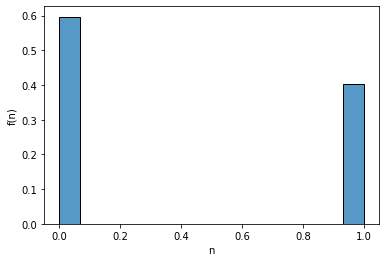

In [ ]:
#Distribución de Bernoulli
p=0.4
r=10000
F=lambda x: 1-p if x<1 else 1
u=np.random.uniform(low=0,high=1,size=r)
n=DiscreteQuantileF(F,u)
sb.histplot(data=n,stat='probability').set(xlabel="n",ylabel="f(n)")
plt.show()

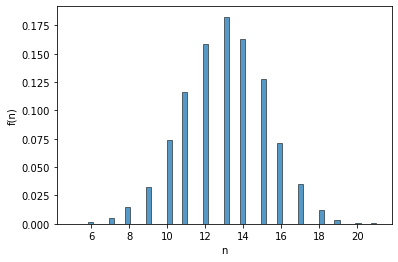

In [ ]:
#Distribución Binomial
p=0.6
N=20
r=10000
F=lambda x: np.sum(np.array([sp.special.binom(N,k)*(p**k)*(1-p)**(N-k) for k in range(x)]))
u=np.random.uniform(low=0,high=1,size=r)
n=DiscreteQuantileF(F,u)
sb.histplot(data=n,stat='probability').set(xlabel="n",ylabel="f(n)")
plt.show()

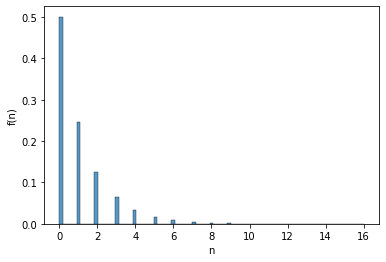

In [ ]:
#Distribución Geométrica
p=0.5
r=10000
F=lambda x: 1-np.power(1-p,x+1)
u=np.random.uniform(low=0,high=1,size=r)
n=DiscreteQuantileF(F,u)
sb.histplot(data=n,stat='probability').set(xlabel="n",ylabel="f(n)")
plt.show()

###Problema 3

Definiremos la función ContinuousQuantile que recibirá como parámetros una función $F$ que representará la función de distribución de una variable aleatoria continua, una función $f$ que representará la densidad de esta varaible aleatoria, y un vector $u\in[0,1]^r$. Esta función retornará un vector $x=(x_1,\ldots,x_r)\in\mathbb{R}^r$ tal que para cada $i\in[r]$ se cumple que $$|F(x_i)-u_i|\leq\delta.$$

Para determinar cada $x_i$, lo que haremos será utilizar el método de Newton-Raphson para encontrar un cero de la función $G_i(x)=F(x)-u_i$ con deriviada $G'(x)=F'(x)=f(x)$ (o que al menos esté bastante cercano a ser raíz de $G_i$).

In [ ]:
def ContinuousQuantile(F,f,u,min=0,error=0.0001):
    r=len(u)
    x=np.full(r,min,dtype=float)
    for i in range(r):
        y=x[i]
        diferencia=error
        while np.abs(F(y)-u[i])>error and diferencia>error/1000:
            #si el incremento de y a z es muy pequeño, entonces estamos oscilando cerca de una raíz
            z=y-(F(y)-u[i])/f(y)
            diferencia=np.abs(y-z)
            y=z
        x[i]=y
    return x

###Ejemplos

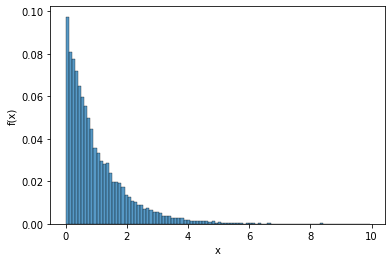

In [ ]:
#Distribución exponencial
L=1
F=lambda x: 1-np.exp(-L*x)
f=lambda x: L*np.exp(-L*x)

r=10000
u=np.random.uniform(low=0,high=1,size=r)
x=ContinuousQuantile(F,f,u)
sb.histplot(data=x,stat='probability').set(xlabel="x",ylabel="f(x)")
plt.show()

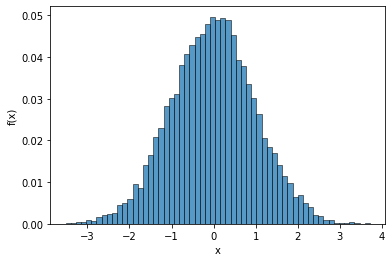

In [ ]:
#Distribución normal
mu=0
sigma=1
F=lambda x: (1+sp.special.erf((x-mu)/(sigma*np.sqrt(2))))/2
f=lambda x: np.exp(-np.power(x-mu,2)/(2*np.power(sigma,2)))/(sigma*np.sqrt(2*np.pi))

r=10000
u=np.random.uniform(low=0,high=1,size=r)
x=ContinuousQuantile(F,f,u)
sb.histplot(data=x,stat='probability').set(xlabel="x",ylabel="f(x)")
plt.show()

###Problema 4

Consideremos una variable aleatoria discreta $X$ con función de probabilidad dada por$$f(j)=\mathbb{P}(X=j)=\left(\frac{1}{2}\right)^j,\quad j\geq 1.$$ 
Notemos que podemos obtener su función de distribución de manera explícita. En efecto:$$
F(j)=\mathbb{P}(X\leq j)=\sum_{i=1}^j\mathbb{P}(X=i)=\sum_{i=1}^j\left(\frac{1}{2}\right)^i=\frac{1}{2}\frac{1-\left(\frac{1}{2}\right)^j}{1-\frac{1}{2}}=1-\left(\frac{1}{2}\right)^j.$$

In [ ]:
#Función de probabilidad de X
f=lambda x: np.power(1/2,x)

#Función de distribución de X
F=lambda x: 1-np.power(1/2,x)

Simularemos esta variable aleatoria con los tres métodos implementados anteriormente. Como la variable es discreta, entonces no hay que hacer nada en el primer y segundo método, pero en el tercer método tomaremos al final la función techo a cada resultado, para obtener un valor discreto.

Analicemos el tiempo de ejecución de simular esta variable aleatoria para $n=10^k$ con $k=1,2,3,4,5$

In [ ]:
time1,time2,time3=[],[],[] #guardaremos los tiempos para cada método
X1,X2,X3=[],[],[] #guardaremos las réplicas de X para cada método
for k in range(5):
    n=np.power(10,k+1)  #número de réplicas
    U=np.random.uniform(size=n)
    for j in range(3):
        if j==0:
            start_time = time.time()
            Y=DiscreteQuantile(f,U,min=1)
            end_time = time.time()
            X1.append(Y)
            time1.append(np.round(end_time-start_time,decimals=4))
        elif j==1:
            start_time = time.time()
            Y=DiscreteQuantileF(F,U,min=1)
            end_time = time.time()
            X2.append(Y)
            time2.append(np.round(end_time-start_time,decimals=4))
        else:
            start_time = time.time()
            Y=np.ceil(ContinuousQuantile(F,f,U,min=1))
            end_time = time.time()
            X3.append(Y)
            time3.append(np.round(end_time-start_time,decimals=4))

exec_time=pd.DataFrame({'Número de Réplicas': [np.power(10,k) for k in range(1,6)],
                        'Tiempo de Ejecución Método 1': time1, 
                        'Tiempo de Ejecución Método 2': time2,
                        'Tiempo de Ejecución Método 3': time3
})
exec_time

,Número de Réplicas,Tiempo de Ejecución Método 1,Tiempo de Ejecución Método 2,Tiempo de Ejecución Método 3
0,10,0.0001,0.0001,0.0009
1,100,0.0006,0.0005,0.0090
2,1000,0.0054,0.0053,0.0896
3,10000,0.0574,0.0529,0.9164
4,100000,0.5345,0.5511,8.8148


Con esta tabla podemos observar que los métodos 1 y 2 son igual de rápidos, mientras que el tercero es más lento, siendo aproximiadamente 10 veces más lento.

Grafiquemos ahora el tiempo de ejecución para los tres métodos para muestras de tamaño desde $1000$ a $34000$.

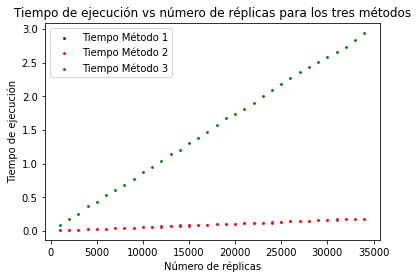

In [ ]:
#demora aproximadamente 1 minuto en ejecutar
n=[1000*i for i in range(1,35)] # haremos desde 1000 hasta 34000 muestras
time1,time2,time3=[],[],[]
X1,X2,X3=[],[],[]

for i in n:
    U=np.random.uniform(size=i)
    for j in range(3):
        if j==0:
            start_time = time.time()
            Y=DiscreteQuantile(f,U,min=1)
            end_time = time.time()
            X1.append(Y)
            time1.append(np.round(end_time-start_time,decimals=4))
        elif j==1:
            start_time = time.time()
            Y=DiscreteQuantileF(F,U,min=1)
            end_time = time.time()
            X2.append(Y)
            time2.append(np.round(end_time-start_time,decimals=4))
        else:
            start_time = time.time()
            Y=np.ceil(ContinuousQuantile(F,f,U,min=1))
            end_time = time.time()
            X3.append(Y)
            time3.append(np.round(end_time-start_time,decimals=4))

sb.scatterplot(x=n,y=time1,color='blue',s=10,label="Tiempo Método 1").set(title='Tiempo de ejecución vs número de réplicas para los tres métodos',
                                                                                 xlabel = "Número de réplicas", ylabel = "Tiempo de ejecución")
sb.scatterplot(x=n,y=time2,color='red',s=10,label="Tiempo Método 2")
sb.scatterplot(x=n,y=time3,color='green',s=10,label="Tiempo Método 3")
plt.show()

Podemos confirmar que el tercer método es demasiado lento en comparación a los otros dos. Veamos más de cerca un gráfico con el método 1 y método 2.

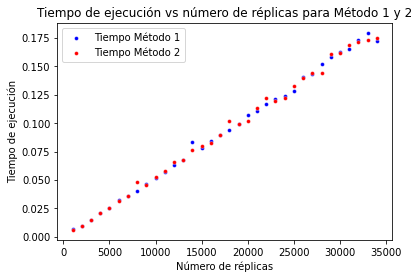

In [ ]:
sb.scatterplot(x=n,y=time1,color='blue',s=15,label="Tiempo Método 1").set(title='Tiempo de ejecución vs número de réplicas para Método 1 y 2',
                                                                                 xlabel = "Número de réplicas", ylabel = "Tiempo de ejecución")
sb.scatterplot(x=n,y=time2,color='red',s=15,label="Tiempo Método 2")
plt.show()

Confirmamos que los métodos 1 y 2 son muy similares en costo, por lo tanto, es irrelevante cuál decidamos utilizar. 

Una vez obtenido el tiempo de ejecución para cada método, estimaremos el costo por réplica dividiendo el tiempo de ejecución por la cantidad de réplicas generadas y luego calculando la media.

In [ ]:
cost=[0,0,0]
for j in range(3):
    costo=0
    for i in range(len(n)):
        if j==0:
            costo+=time1[i]/n[i]
        elif j==1:
            costo+=time2[i]/n[i]
        else:
            costo+=time3[i]/n[i]
        cost[j]=costo/len(n)

cost_time=pd.DataFrame({'Método': [k for k in range(1,4)],
                        'Costo por Réplica': cost})
cost_time

,Método,Costo por Réplica
0,1,0.000005
1,2,0.000005
2,3,0.000087


De acuerdo a esta estimación, podemos decir que los métodos 1 y 2 son muy similares en costo y ambos menos costoso que el método 3 llega a ser 10 veces más lento. De esta forma, podemos ordenar los métodos según eficiencia como Método 2, Método 1 (con pequeñas diferencias) y por último el Método 3.

Notemos que en los tres métodos hemos querido hacer lo mismo, encontrar la inversa generalizada de una variable aleatoria. En los primeros dos métodos lo hicimos para variables discretas, el primero con la función de probabilidad y el segundo con la función de distribución, siendo totalmente equivalentes (de ahí, que sean similares en tiempo de ejecución). En el tercer método intentamos encontrar la inversa generalizada de una variable continua mediante el método de Newton-Raphson. Recordemos que esto sirve para simular la variable aleatoria $X$ mediante uniformes, pues $F_X^{-}(U)\sim\text{Ley}(X)$. Por lo tanto, es natural esperar el mismo resultado al aplicar estos métodos.

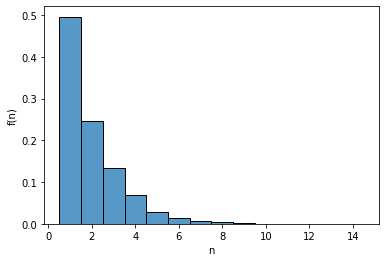

In [ ]:
sb.histplot(data=X1[4],stat='probability',binrange=(1,14),discrete=True).set(xlabel="n",ylabel="f(n)")
plt.show()

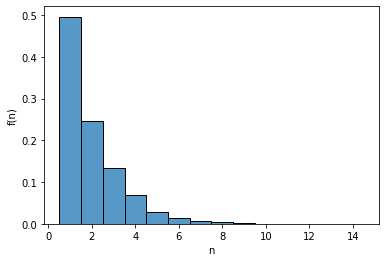

In [ ]:
sb.histplot(data=X2[4],stat='probability',binrange=(1,14),discrete=True).set(xlabel="n",ylabel="f(n)")
plt.show()

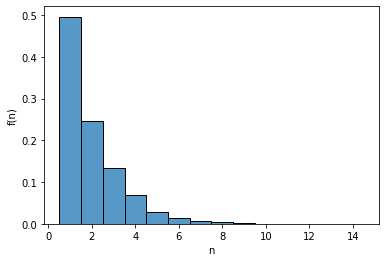

In [ ]:
sb.histplot(data=X3[4],stat='probability',binrange=(1,14),discrete=True).set(xlabel="n",ylabel="f(n)")
plt.show()

###Problema 5

Calculemos la esperanza y varianza de $X$. Para eso, recordemos la serie geométrica$$\sum_{n=0}^\infty x^n=\frac{1}{1-x},\quad|x|<1$$
Calculando la primera y segunda derivada, obtenemos que$$\sum_{n=1}^\infty nx^{n-1}=\frac{1}{(1-x)^2}\quad\text{y}\quad\sum_{n=2}^\infty n(n-1)x^{n-2}=\frac{2}{(1-x)^3},\quad|x|<1$$

Reemplazando $x=\frac{1}{2}$ en la segunda serie podemos probar que
$$\mathbb{E}(X)=\sum_{n=1}^\infty n\mathbb{P}(X=n)=\sum_{n=1}^\infty n\left(\frac{1}{2}\right)^n=\frac{1}{2}\sum_{n=1}^\infty n\left(\frac{1}{2}\right)^{n-1}=\frac{1}{2}\frac{1}{\left(1-\frac{1}{2}\right)^2}=2.$$

Haciendo lo mismo con la tercera serie obtenemos que$$\begin{align}\mathbb{E}(X^2)=&\sum_{n=1}^\infty n^2\mathbb{P}(X=n)=\sum_{n=1}^\infty n^2\left(\frac{1}{2}\right)^n\\=&\sum_{n=2}^\infty(n-1)^2\left(\frac{1}{2}\right)^{n-1}\\=&\sum_{n=2}^\infty n(n-1)\left(\frac{1}{2}\right)^{n-1}-\sum_{n=2}^\infty(n-1)\left(\frac{1}{2}\right)^{n-1}\\=&\frac{1}{2}\sum_{n=2}^\infty n(n-1)\left(\frac{1}{2}\right)^{n-2}-\sum_{n=1}^\infty n\left(\frac{1}{2}\right)^n\\=&\frac{1}{2}\frac{2}{\left(1-\frac{1}{2}\right)^3}-2=6.\end{align}$$

Por lo tanto
$$\mathbb{V}\text{ar}(X)=\mathbb{E}(X^2)-\mathbb{E}(X)^2=2$$

Calcularemos las medias y varianzas muestrales haciendo uso de los siguientes estimadores:$$\mu_n=\frac{1}{n}\sum_{k=1}^nX_k\quad\text{y}\quad\sigma^2_n=\frac{1}{n-1}\sum_{k=1}^n(X_k-\mu_n)^2$$

In [ ]:
#demora aproximadamente 1 minuto
mean=np.zeros(7)
var=np.zeros(7)
for k in range(7):
    n=np.power(10,k+1)
    U=np.random.uniform(size=n)
    X=DiscreteQuantileF(F,U,min=1)
    mean[k]=np.round(np.sum(X)/len(X),decimals=2)
    Y=np.power(X-mean[k],2)
    var[k]=np.round(np.sum(Y)/(len(Y)-1),decimals=4)

meanvar=pd.DataFrame({'Número de Réplicas': [np.power(10,k) for k in range(1,8)],
                        'Media muestral': mean, 'Varianza muestral': var})
meanvar

,Número de Réplicas,Media muestral,Varianza muestral
0,10,1.90,2.5444
1,100,1.85,1.5429
2,1000,2.06,2.2953
3,10000,2.01,2.0322
4,100000,2.01,2.0090
5,1000000,2.00,2.0067
6,10000000,2.00,2.0042


Podemos observar que a medida que aumentamos la cantidad de réplicas (es decir, $n\to\infty$) obtenemos una mejor estimación tanto de la media como de la varianza, lo cual era esperable gracias a la Ley de los Grandes Números. 

Grafiquemos la media y varianza muestral para más valores de $n$.

In [ ]:
#demora aproximadamente 1 minuto
n=[101*i for i in range(1,500)]
mean=np.zeros(len(n))
var=np.zeros(len(n))

for k in range(len(n)):
    U=np.random.uniform(size=n[k])
    X=DiscreteQuantileF(F,U,min=1)
    mean[k]=np.round(np.sum(X)/len(X),decimals=2)
    Y=np.power(X-mean[k],2)
    var[k]=np.round(np.sum(Y)/(len(Y)-1),decimals=4)

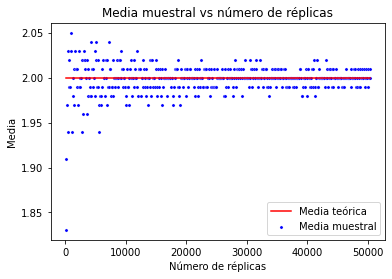

In [ ]:
sb.scatterplot(x=n,y=mean,color='blue',s=10,label="Media muestral").set(title='Media muestral vs número de réplicas',
                                                                                 xlabel = "Número de réplicas", ylabel = "Media")
sb.lineplot(x=n,y=2,color='red',label='Media teórica')
plt.show()

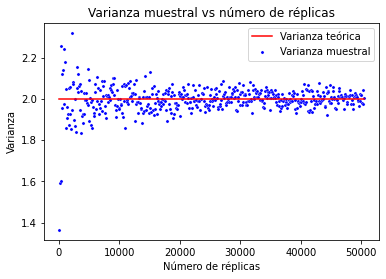

In [ ]:
sb.scatterplot(x=n,y=var,color='blue',s=10,label="Varianza muestral").set(title='Varianza muestral vs número de réplicas',
                                                                                 xlabel = "Número de réplicas", ylabel = "Varianza")
sb.lineplot(x=n,y=2,color='red',label='Varianza teórica')
plt.show()

# Pregunta 4


### Parte 1 

#### Método 1: Simulación con V.A. uniformes discretas
(Todos los modelos debiesen tardar <= 1 min en correr)

Tomando en cuenta el método de simualción aceptación-rechazo, lo primero que se piensa es que, considerando variables aleatorias uniformes discretas ($Y_n$), se tiene que buscar una mínima constante $K$ tal que $f(x) \leq Kg(x)$ donde $f(x)$ y $g(x)$ son las densidades de $Y_{\lambda,s}$ y las VA's discretas respectivamente. Con esto en mente, se busca un $k$ que maximice el valor de $\mathbb{P}(Y_{\lambda,s}=k)$. Esto se puede obtener obseravndo que el denominador de $\mathbb{P}(Y_{\lambda,s}=k)$ no depende de k, y que el denominador maximiza con k=0 y k=1. Para este caso, la función $f(x)$ resulta $f(x)=\frac{\frac{e^{-\lambda}\lambda^k}{k!}}{\sum_{j=0}^{s} \frac{e^{-\lambda}\lambda^j}{j!}} = \frac{e^{-1}}{\sum_{j=0}^{8} \frac{e^{-1}}{j!}} = \frac{1}{\sum_{j=0}^{8} \frac{1}{j!}}$ y donde la función $g(x)$ vale $1/9$.  
Así se puede calcular el valor de $K$ resultando $K=0.367879855110811 \cdot 9=3.310918695997299 \approx 3.3109$  

Luego, se define $\alpha(x):= \frac{f(x)}{Kg(x)} \cdot 1_{g(x)>0}$ donde esta indicatriz no es necesaria debido a que $g(x)$ son distribuciones de VA's uniformes discretas. Así,  
$\alpha(k)=\frac{\frac{1}{k!} \cdot \frac{1}{\sum_{j=0}^{8} \frac{1}{j!}}}{K\cdot \frac{1}{9}} = \frac{1}{k!}$  
Por lo que, siguiendo este método, solo resta calcular $N$ de la forma $N=inf\{n \in \mathbb{N}: U_n \leq \alpha(Y_n)\}$

A continuación se calcularán los valores prácticos de K para cada modelo y se crearan funciones para calcular el $N$ del método de aceptación-rechazo, junto con funciones con un parámetro $n$ que entregue n réplicas de algun modelo elegido.

In [ ]:
#Cálculo de K1
s=0
for j in range(0,9):
  s=s+(1/m.factorial(j))
K1=1/s*9
print('K1 =', K1)

K1 = 3.310918695997299


In [ ]:
#Función para encontrar el N del método aceptación-rechazo (caso Y_n uniformes discretas)
def N1():
  Yn=np.random.randint(0,9)
  while uniforme(1,'random')[0] > 1/m.factorial(Yn):
    Yn=np.random.randint(0,9)
  return Yn

#Primer modelo (n es la cantidad de muestras que se quiere)
def m1(n):
  L=[]
  for i in range(0,n):
    L.append(N1())
  return L

#### Método 2: Simulación con V.A. Poisson

Al igual que antes, se modelará de la misma forma pero esta vez con $Y_n \sim$ Poisson, esto implica que $g(x)$ (con $\lambda=1$) será $\frac{e^{-1}}{k!}$. Con el mismo desarrollo anterior, el valor de $K$ resulta:  
$K=\frac{e}{\sum_{j=0}^{8} 1/j!} \approx 1$ (El valor de $K$ es ligeramente superior a 1 pues la expresión del denominador es la serie de potencia de $e$ pero con 8 términos)

In [ ]:
#Cálculo de K2
s=0
for j in range(0,9):
  s=s+(1/m.factorial(j))
K2=np.exp(1)/s
print('K2 =', K2)

K2 = 1.0000011252038639


Se modelará la distribución de Poisson de la siguiente forma:  
$N := sup\bigg\{ n \in \mathbb{N}: - \displaystyle \sum_{i=1}^{n} ln(U_i) < \lambda \bigg\}$  
Por lo que se tiene $N \sim$ Poisson($\lambda$)

In [ ]:
#Simulación de VA poisson con VA's uniformes
def Poisson(lam):
  s=0
  n=-1
  while -s<lam:    
    s+=np.log(uniforme(1,'random')[0])
    n+=1
  return n

#Función para encontrar el N del método aceptación-rechazo (caso Y_n Poisson)
#Notar que no es necesario simular variables uniformes, pues como alpha resulta ser una indicatriz, solo
#resta verificar si el valor pertenece o no al conjunto {0,...,8}
def N2():
  Yn=Poisson(1)
  while Yn>8:
    Yn=Poisson(1)
  return Yn

#Segundo modelo (n es la cantidad de muestras que se quiere)
def m2(n):
  L=[]
  for i in range(0,n):
    L.append(N2())
  return L

A continuación se graficaran algunos ejemplos de la variable aleatoria a simular, vista desde ambos modelos y se podrá observar que valores discretos son los que la variable simulada toma.

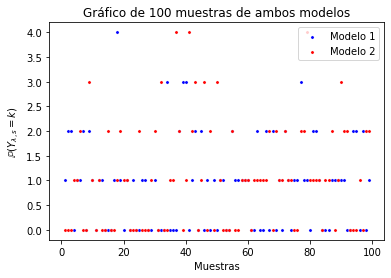

In [ ]:
#Sampleo de ejemplo para la distribución del enunciado
n=[]
for i in range(1,100):
  n.append(i)
Y11=m1(99)
Y22=m2(99)
sb.scatterplot(x=n,y=Y11,color='blue',s = 10,label="Modelo 1").set(title='Gráfico de 100 muestras de ambos modelos',xlabel = "Muestras", ylabel = "$\mathbb{P}(Y_{\lambda,s}=k)$")
sb.scatterplot(x=n,y=Y22,color='red',s = 10,label="Modelo 2")

En el sampleo anterior se puede observar que los modelos tienden a los mismos números, teniendo mayor densidad en los valores 0,1,2. Mientras que valores sobre 3 son muy poco probables.

### Eficencia teórica de los métodos

Como ya se vió en el método de aceptación-rechazo, el $N$ calculado distribuye como $N\sim$ geom($1/K$), donde su esperanza es de $K$, y así, el valor de esta constante es lo único que determina el costo teórico de cada modelo. Por lo tanto, se tiene que  
Costo modelo 1: $C(m1)=K1*2*C(U) \approx 6.6218*C(U)$  
Costo modelo 2: $C(m2)=K2*C(U)*C(Poisson) \approx 1*C(U)*\lambda*C(U) = \lambda*C(U)^2$  
Sin embargo, como la función $\alpha(x)$ resulta ser una indicatriz, podemos ahorrar el costo de una uniforme y quedar así en:    
$C(m2)=K2*C(Poisson) \approx \lambda*C(U)$  

Donde $C(U)$ es el costo de una uniforme y $C(Poisson)$ es el costo de una Poisson que es, en promedio, $\lambda*C(U)$ debido a su construcción. A estos resultados se les puede agregar un costo de evaluación y un $n$ multiplicando si se quieren $n$ muestras.  
Con esto se puede concluir que, reemplazando el valor de $\lambda=1$, el modelo 2 es más eficiente.

[Text(0, 0.5, '$E(Y_{\\lambda,s})$'),
 Text(0.5, 0, 'muestras usadas (n)'),
 Text(0.5, 1.0, 'Estimación de $E(Y_{\\lambda,s})$ para varios n° de réplicas')]

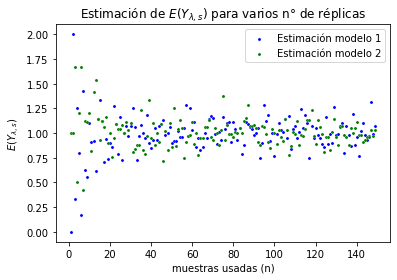

In [ ]:
#Gráfico
n=[]
for i in range(1,150):
  n.append(i)
EX=[]
EX2=[]
timeX=[]
timeX2=[]
for i in n:
  t_inicio=time.time()
  estimacion=0
  for j in range(i):
    Xj= m1(1)[0]
    estimacion+=Xj
  estimacion=estimacion/i
  t_final=time.time()
  EX.append(estimacion)
  timeX.append(t_final-t_inicio)
  t_inicio2=time.time()
  estimacion2=0
  for j in range(i):
    Xj2= m2(1)[0]
    estimacion2+=Xj2
  estimacion2=estimacion2/i
  t_final2=time.time()
  EX2.append(estimacion2)
  timeX2.append(t_final2-t_inicio2)

sb.scatterplot(x=n,y=EX,color='blue',s = 10,label="Estimación modelo 1").set(title='Estimación de $E(Y_{\lambda,s})$ para varios n° de réplicas',xlabel = "muestras usadas (n)", ylabel = "$E(Y_{\lambda,s})$")
sb.scatterplot(x=n,y=EX2,color='green',s = 10,label="Estimación modelo 2").set(title='Estimación de $E(Y_{\lambda,s})$ para varios n° de réplicas',xlabel = "muestras usadas (n)", ylabel = "$E(Y_{\lambda,s})$")

De este gráfico ya se puede ver como los dos modelos se acercan bastante el uno al otro en término de la esperanza que se quiere simular. Por otro lado ya se empieza a ver una tendencia sobre $E(Y_{\lambda,s})$

[Text(0, 0.5, 'Demora (s)'),
 Text(0.5, 0, 'Muestras usadas (n)'),
 Text(0.5, 1.0, 'Tiempo usado para cada n° de réplicas de X')]

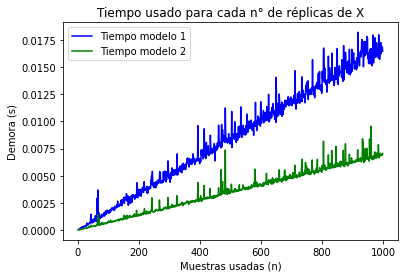

In [ ]:
#Gráfico
n=[]
for i in range(1,1000):
    n.append(i)
EX=[]
EX2=[]
timeX=[]
timeX2=[]
for i in n:
  t_inicio=time.time()
  estimacion=0
  for j in range(i):
    Xj= m1(1)[0]
    estimacion+=Xj
  estimacion=estimacion/i
  t_final=time.time()
  EX.append(estimacion)
  timeX.append(t_final-t_inicio)
  t_inicio2=time.time()
  estimacion2=0
  for j in range(i):
    Xj2= m2(1)[0]
    estimacion2+=Xj2
  estimacion2=estimacion2/i
  t_final2=time.time()
  EX2.append(estimacion2)
  timeX2.append(t_final2-t_inicio2)
sb.lineplot(x=n,y=timeX,color='blue',label="Tiempo modelo 1").set(title='Tiempo usado para cada n° de réplicas de X',xlabel = "Muestras usadas (n)", ylabel = "Demora (s)")
sb.lineplot(x=n,y=timeX2,color='green',label="Tiempo modelo 2").set(title='Tiempo usado para cada n° de réplicas de X',xlabel = "Muestras usadas (n)", ylabel = "Demora (s)")

Acá se puede notar que, tal como se predijo en los costos teóricos, el modelo 2 es más eficiente que el modelo 1 y se puede ver un comportamiento lineal. Este gráfico está hecho con mayor cantidad de muestras para así apreciar mejor este comportamiento, sin embargo, no se sabe en que medida, o que tan grande es la diferencia entre los modelos. Eso se analizará con mayor detalle en la Parte 2.

## Parte 2

In [ ]:
#Cálculo de varianza piloto (Estimador Insesgado)
q=1000 #valor "pequeño"
muestra1=m1(q)
muestra2=m2(q)
s=0
rr=0
for i in muestra1:
  s+=i
PromedioMuestra1=s/q
for i in muestra2:
  rr+=i
PromedioMuestra2=rr/q
sv=0
rv=0
for i in range(0,q):
  sv+=(PromedioMuestra1-muestra1[i])**2
for i in range(0,q):
  rv+=(PromedioMuestra2-muestra2[i])**2
Varpiloto1=sv/(q-1)
Varpiloto2=rv/(q-1)
print('Varianza piloto modelo1:',Varpiloto1)
print('Varianza piloto modelo2:',Varpiloto2)

Varianza piloto modelo1: 1.0380130130130187
Varianza piloto modelo2: 0.9419409409409361


In [ ]:
#Se quiere una precisión de 0.2 con probabilidad del 95%
Var1=Varpiloto1
Var2=Varpiloto2
Err=0.2
Pr=0.95
z=ss.norm.ppf(1-(1-Pr)/2)
nY1=int(Var1*z**2//Err**2)
nY2=int(Var2*z**2//Err**2)
print("Para una precisión de 0.2 con probabilidad del 95% se obtiene:")
print("número de muestras para modelo 1=",nY1)
print("número de muestras para modelo 2=",nY2)

Para una precisión de 0.2 con probabilidad del 95% se obtiene:
número de muestras para modelo 1= 99
número de muestras para modelo 2= 90


Análisis teórico de $\mathbb{E}(Y_{\lambda,s})$:  
$\sum_{k=0}^{s} k \cdot \frac{\frac{e^{-\lambda}\lambda^k}{k!}}{\sum_{j=0}^{s} \frac{e^{-\lambda}\lambda^j}{j!} } 
= \frac{1}{\sum_{j=0}^{s} \frac{\lambda^j}{j!}} \cdot \sum_{k=0}^{s}\frac{k\lambda^k}{k!}$  
Luego, con un poco de álgebra de sumatorias y reemplazando $\lambda=1$ y $s=8$ se obtiene:  
$\frac{1}{\sum_{j=0}^{8} \frac{1}{j!}} \cdot (1 \cdot \sum_{k=0}^{8} \frac{1}{k!} - \frac{1}{8!}) = 1 - \frac{1}{8!\sum_{j=0}^{8} \frac{1}{j!}} \approx 1$  


Veremos que esta aproximaciónm de la esperanza se ve reflejada en los gráficos.

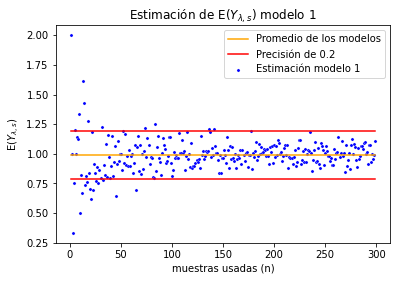

In [ ]:
#Gráfico
n=[]
for i in range(1,300):
  n.append(i)
EX=[]
timeX=[]
for i in n:
  t_inicio=time.time()
  estimacion=0
  for j in range(i):
    Xj= m1(1)[0]
    estimacion+=Xj
  estimacion=estimacion/i
  t_final=time.time()
  EX.append(estimacion)
  timeX.append(t_final-t_inicio)
  t_inicio2=time.time()
  estimacion2=0

sb.scatterplot(x=n,y=EX,color='blue',s = 10,label="Estimación modelo 1").set(title='Estimación de E($Y_{\lambda,s}$) modelo 1',xlabel = "muestras usadas (n)", ylabel = "E($Y_{\lambda,s}$)")
#Cálculo del promedio de E(Y) de cada modelo
prom1=sum(EX)/len(EX)
sb.lineplot(x=n,y=prom1,color='orange',label="Promedio de los modelos")
sb.lineplot(x=n,y=prom1+0.2,color='red',label="Precisión de 0.2")
sb.lineplot(x=n,y=prom1-0.2,color='red')

En el gráfico anterior ya se puede ver como el modelo 1 aproxima de buena manera la esperanza a 1 a partir de las 100 muestras.

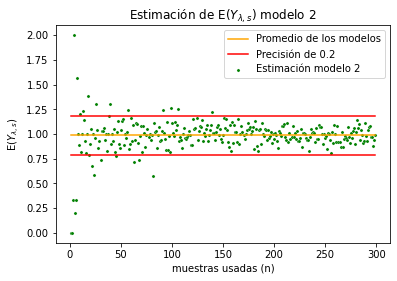

In [ ]:
#Gráfico
n=[]
for i in range(1,300):
  n.append(i)
EX=[]
timeX=[]
for i in n:
  t_inicio=time.time()
  estimacion=0
  for j in range(i):
    Xj= m2(1)[0]
    estimacion+=Xj
  estimacion=estimacion/i
  t_final=time.time()
  EX.append(estimacion)
  timeX.append(t_final-t_inicio)
  t_inicio2=time.time()
  estimacion2=0

sb.scatterplot(x=n,y=EX,color='green',s = 10,label="Estimación modelo 2").set(title='Estimación de E($Y_{\lambda,s}$) modelo 2',xlabel = "muestras usadas (n)", ylabel = "E($Y_{\lambda,s}$)")
#Cálculo del promedio de E(Y) de cada modelo
prom2=sum(EX)/len(EX)
sb.lineplot(x=n,y=prom2,color='orange',label="Promedio de los modelos")
sb.lineplot(x=n,y=prom2+0.2,color='red',label="Precisión de 0.2")
sb.lineplot(x=n,y=prom2-0.2,color='red')

Al igual que antes, el modelo 2 empieza a converger bastante a partir de las 100 muestras

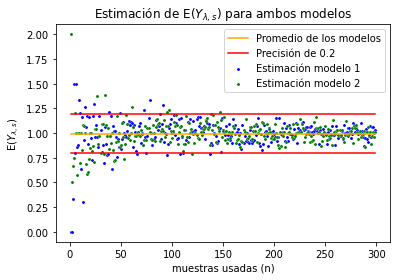

In [ ]:
#Gráfico
n=[]
for i in range(1,300):
  n.append(i)
EX=[]
EX2=[]
timeX=[]
timeX2=[]
for i in n:
  t_inicio=time.time()
  estimacion=0
  for j in range(i):
    Xj= m1(1)[0]
    estimacion+=Xj
  estimacion=estimacion/i
  t_final=time.time()
  EX.append(estimacion)
  timeX.append(t_final-t_inicio)
  t_inicio2=time.time()
  estimacion2=0
  for j in range(i):
    Xj2= m2(1)[0]
    estimacion2+=Xj2
  estimacion2=estimacion2/i
  t_final2=time.time()
  EX2.append(estimacion2)
  timeX2.append(t_final2-t_inicio2)

sb.scatterplot(x=n,y=EX,color='blue',s = 10,label="Estimación modelo 1")
sb.scatterplot(x=n,y=EX2,color='green',s = 10,label="Estimación modelo 2").set(title='Estimación de E($Y_{\lambda,s}$) para ambos modelos',xlabel = "muestras usadas (n)", ylabel = "E($Y_{\lambda,s}$)")
#Cálculo del promedio de E(Y) de cada modelo
prom11=sum(EX)/len(EX)
prom22=sum(EX2)/len(EX2)
prom=(prom11+prom22)/2
sb.lineplot(x=n,y=prom,color='orange',label="Promedio de los modelos")
# COMENTARIO: Por términos visuales del gráfico, en el código se calcula el promedio del modelo 1 y del
# modelo 2 (prom1 y prom2 respectivamente) pero en el gráfico se muestra el promedio entre prom1 y prom2
# para visualizar mejor esta recta
sb.lineplot(x=n,y=prom+0.2,color='red',label="Precisión de 0.2")
sb.lineplot(x=n,y=prom-0.2,color='red')

Tal y como se comentó antes, la esperanza se ve convergiendo al valor de 1 para ambos modelos con una precisión de 0.2 al 95%

[Text(0, 0.5, 'Tiempo (s)'),
 Text(0.5, 0, 'muestra'),
 Text(0.5, 1.0, 'Tiempo utilizado por cada modelo')]

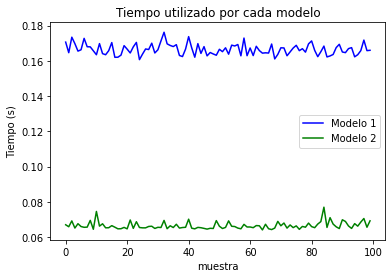

In [ ]:
t_m1=[]
t_m2=[]
for i in range(100):
  inicio=time.time()
  U1=m1(10000)
  final=time.time()
  t_m1.append(final-inicio)
  inicio=time.time()
  U=m2(10000)
  final=time.time()
  t_m2.append(final-inicio)
sb.lineplot(x=range(100),y=t_m1,color="blue",label="Modelo 1")
sb.lineplot(x=range(100),y=t_m2,color="green",label="Modelo 2").set(title='Tiempo utilizado por cada modelo',xlabel = "muestra", ylabel = "Tiempo (s)")

Acá se ven mejor los tiempos de cada modelo, y tal como se había comentado antes, el modelo 2 es más eficiente que el modelo 1. Para un análisis más profundo, en la siguiente celda se calcularán los promedios y se verá su diferencia.

In [ ]:
tiempo_m1=sum(t_m1)/len(t_m1)
tiempo_m2=sum(t_m2)/len(t_m2)
print('Tiempo promedio del modelo 1: ', tiempo_m1)
print('Tiempo promedio del modelo 2: ', tiempo_m2)
print('Diferencia de tiempos:', tiempo_m1-tiempo_m2)

Tiempo promedio del modelo 1:  0.16645400762557983
Tiempo promedio del modelo 2:  0.06642728090286255
Diferencia de tiempos: 0.10002672672271727


Como se puede observar en todo este desarrollo, la práctica no sigue exactamente el camino de la teoría, y esto se debe a las diferentes formas de modelar cada paso para conseguir esta simulación final de $Y_{\lambda,s}$.
Probablemente esta diferencia de tiempo (que debiese ser una 6 veces mayor que la otra) se deba a que, en las funciones programadas se tome más tiempo del pensado en calcular valores auxiliares como contadores o llamadas a otras funciones.